In [1]:
import numpy as np
import pandas as pd
import sklearn
df = pd.read_csv(r'D:\Downloads\clean_dataset.csv')
df.head()

,Score,Text,Sentiment
0,3,the service was great but the cats didnot like...,Neutral
1,3,good i love the taste the fact that it is lo...,Neutral
2,3,fishy smell yes weird texture yes the smell re...,Neutral
3,1,hey when amazon sold me this exact case of bec...,Negative
4,5,kind plus pomegranate blueberry pistachio bars...,Positive


In [2]:
df['Score'].value_counts()

Score
3    29769
5    24357
1    19015
2    10754
4     5412
Name: count, dtype: int64

In [3]:
df = df.rename({"Text": "Review"}, axis=1)

In [4]:
df.shape

(89307, 3)

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeste\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
stop_words = stopwords.words('english')

In [7]:
len(stop_words)

179

In [8]:
negative_words=['no','not',"don't","aren't","couldn't","didn't","doesn't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","shouldn't","wasn't","weren't","won't","wouldn't"]
for negative_word in negative_words:
  stop_words.remove(negative_word)

len(stop_words)

160

In [9]:
import re             # re -> regular expressions
REPLACE_BY_SPACE_RE = re.compile('[/(){}—[]|@,;‘?|।!-॥–’-]')

def clean_text(sample):
  sample = sample.lower()
  sample = sample.replace("", "")
  sample = REPLACE_BY_SPACE_RE.sub(' ', sample)
  sample = re.sub("[^a-z]+", " ", sample)
  sample = sample.split(" ")
  sample = [word for word in sample if word not in stop_words ]
  sample = " ".join(sample)
  return sample

In [10]:
df['Review'] = df['Review'].apply(clean_text)
conditions = [
    (df['Score'] >= 4),
    (df['Score'] == 3),
    (df['Score'] <= 2)
    ]
values = ['Positive', 'Neutral', 'Negative']
df['sentiment'] = np.select(conditions, values)
df.head()

,Score,Review,Sentiment,sentiment
0,3,service great cats didnot like iti guess wont ...,Neutral,Neutral
1,3,good love taste fact low sodiumbad advertiseme...,Neutral,Neutral
2,3,fishy smell yes weird texture yes smell really...,Neutral,Neutral
3,1,hey amazon sold exact case bechtle traditional...,Negative,Negative
4,5,kind plus pomegranate blueberry pistachio bars...,Positive,Positive


<Axes: xlabel='sentiment'>

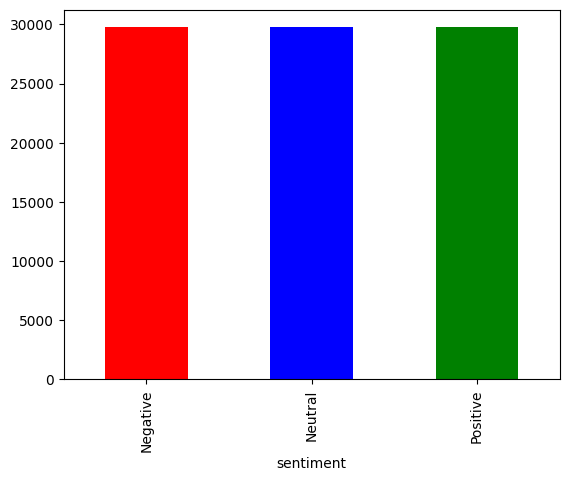

In [11]:
import matplotlib.pyplot as plt
df['sentiment'].value_counts().sort_index().plot.bar(color=['red', 'blue', 'green'])

In [12]:
x = df['Review'].values
y = df['sentiment'].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0,stratify = y)

In [13]:
np.unique(y_train,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([23815, 23815, 23815], dtype=int64))

In [14]:
np.unique(y_test,return_counts=True)

(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([5954, 5954, 5954], dtype=int64))

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.svm import LinearSVC
text_model = Pipeline([
    ('tfidf', HashingVectorizer(ngram_range=(1, 2))), 
    ('model', LinearSVC())
])

In [16]:
text_model.fit(x_train,y_train)
y_pred = text_model.predict(x_test)
np.unique(y_pred,return_counts=True)

C:\Users\jeste\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


(array(['Negative', 'Neutral', 'Positive'], dtype=object),
 array([6029, 5737, 6096], dtype=int64))

In [17]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_pred,y_test)*100

78.74818049490538

In [18]:
confusion_matrix(y_pred,y_test)

array([[4776,  958,  295],
       [ 862, 4253,  622],
       [ 316,  743, 5037]], dtype=int64)

In [19]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

    Negative       0.80      0.79      0.80      6029
     Neutral       0.71      0.74      0.73      5737
    Positive       0.85      0.83      0.84      6096

    accuracy                           0.79     17862
   macro avg       0.79      0.79      0.79     17862
weighted avg       0.79      0.79      0.79     17862



In [20]:
text_model.predict(["we're used to spicy foods down here in south texas and these are not at all spicy.  doubt very much habanero is used at all.  could take it up a notch or two."])

array(['Negative'], dtype=object)

In [21]:
text_model.predict(['This product is stupid!'])

array(['Negative'], dtype=object)

In [22]:
text_model.predict(["No tea flavor at all. Just whole brunch of artifial flavors. It is not returnable. I wasted 20+ bucks."])

array(['Negative'], dtype=object)